# Lab 4.1: Regex and NLTK

## TA: Andrea Treviño Gavito

## Date: February 26th, 2020.


## Regular expressions

In Python, the `re` module provides regular expression support. To define a regular expression use either a string preceeded by the literal r (called a raw string) or use the `re.compile` function.

In [ ]:
import re

## Two ways of declaring a regex
pat = r'[A-Z][a-z]+'
pat = re.compile('[A-Z][a-z]+')

Both the above expressions capture patterns beginning with an uppercase letter followed by at least one or more lower case letters. 

### Searching

A simple search expression is as follows:

```
match = re.search(pat,s)
```

The `re.search` method takes a regex pattern and a string and searchs for the *first occurence* of the pattern within the string. If the search is successful, a Match object is returned. Otherwise, `None` is returned. 

In [ ]:
s1 = "Bob has assigned the task to Alice."
s2 = "A cat has nine lives"

match1 = re.search(pat,s1)
match2 = re.search(pat,s2)
print("Returned value: {}".format(match1))
print("Returned value: {}".format(match2))

print("Matched value in string: {}".format(match1.group()))

Similarily, if you want to search for *all occurences* of a pattern:
```
match = re.findall(pat,s)
```

The `re.findall` method is used when you want to iterate over the lines of the file, it will return a list of all the matches in a single step.

In [ ]:
re.findall(pat,s1)

### Substituting

The `re.sub` function takes a pattern to be replaced, the replacement string, and the string within which the pattern is to be replaced. If no pattern is found, the string is return unchanged. The following code replaces all emails with "emailToken".

In [ ]:
s = "Send us an email to either abc123@gmail.com or xyz@outlook.com"
re.sub(r'[A-Za-z0-9\.-_]+@[A-Za-z\.]+','emailToken',s)

#### Example
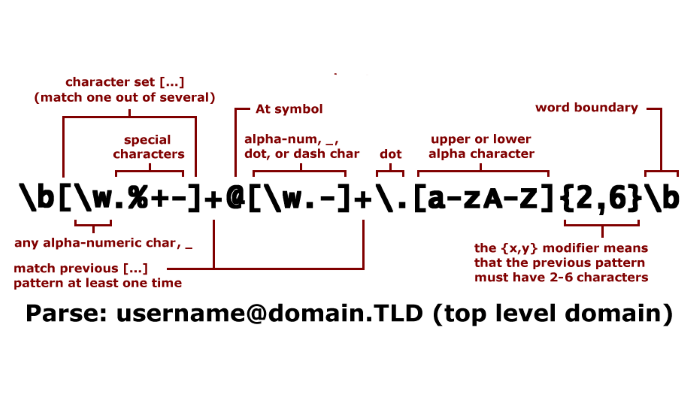


In [ ]:
print(re.sub(r'[\w]+@+[\w]+','emailToken',s))
print(re.sub(r'[\w]+@+[\w.]+','emailToken',s))

### Groups

In [ ]:
s = "Tim Cook is the CEO of Apple. Apple was founded by Steve Jobs and Steve Wozniak in the late 70s."
match = re.match(r'([A-Z]\w+) ([A-Z]\w+)',s)

print("Entire match: {}".format(match.group(0)))
print("Group 1 (First Name) match: {}".format(match.group(1)))
print("Group 2 (Last Name) match: {}".format(match.group(2)))

For *all occurences*:

In [ ]:
# Extract all names
print(re.findall(r'([A-Z]\w+) ([A-Z]\w+)',s))  #()  Enclose a group of REs
print(re.findall(r'[A-Z]\w+ [A-Z]\w+',s))

In [ ]:
# Extracting only last names
re.findall(r'[A-Z]\w+ ([A-Z]\w+)',s)

In [ ]:
# Extract domain and service name
s = "abc123@gmail.com xyz@outlook.com werz@organization.org"
re.findall(r'@(\w+)\.(\w+)',s)

### Splitting

The `re.split` function is used to split string by occurences of pattern. If there are groups in the pattern, then the text of all the groups are returned.

In [ ]:
# example split by whitespace (spaces, newlines tabs)
s = "Roses are red, Violets are blue"
print("Original String:")
print(s)
print("\nSplitted string:")
print(re.split(r'\s',s))

In [ ]:
# Split with groups in pattern
s = "Send us an email to either abc123@gmail.com or xyz@outlook.com"
re.split(r'[A-Za-z0-9\.-_]+@([A-Za-z\.]+)',s)

## The NLTK library

The NLTK package provides various NLP algorithms such as tokenization, stemming, lemmatization, parts of speech tagging, etc.

**Note**: You will be needing additional downloads if your using nltk for the first time. Run the following lines from the iPython console.

```
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
```

### Tokenization

The first step in NLP is breaking down text into units - tokens. 

`sent_tokenize` breaks texts into sentences.

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

In [ ]:
from nltk.tokenize import word_tokenize,sent_tokenize,RegexpTokenizer
text = "Each year, millions of Americans walk out of a doctor's office with a misdiagnosis. Physicians try to be systematic when identifying illness and disease, but bias creeps in. Alternatives are overlooked."
sentences = sent_tokenize(text)
print(sentences)

`word_tokenize` splits text by punctutation and white spaces. The punctutations are captured. Contractions such as "shoudn't" are split ("shouldn","'t").

In [ ]:
# text by tokens
tokens_text = word_tokenize(text)
print("Tokens for entire text:")
print(tokens_text)

tokens_sent1 = word_tokenize(sentences[0])
print("\nTokens for the first sentence")
print(tokens_sent1)

`RegexpTokenizer` allows you to capture tokens by regex pattern.

In [ ]:
# Regex tokenizer
tokenizer = RegexpTokenizer("\w+")
tokens_sent2 = tokenizer.tokenize(sentences[0])
print(tokens_sent2)

The `nltk.tokenize` submodule has specialized tokenizers such as `TweetTokenizer`, which is used for tokenizing tweets and special characters such as 

**Exercise**:
Implement `sent_tokenize` and `word_tokenize` using regex. Demonstrate them on the `text` variable.

In [ ]:
### YOUR CODE GOES HERE

### POS Tagging

The `pos_tag` function handles parts of speech tagging. A list of POS tags is given here https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

In [ ]:
from nltk import pos_tag
sent = "The cat jumped over the gate."
sent_tokens = word_tokenize(sent)
sent_tagged = pos_tag(sent_tokens)
print(sent_tokens)
print(sent_tagged)

What about words that have different meanings in the same sentence?

In [ ]:
# same words appearing as parts of speech
sent = "They refuse to permit us to obtain the refuse permit."
sent_tokens = word_tokenize(sent)
sent_tagged = pos_tag(sent_tokens)
print(sent_tagged)

The words refuse and permit are verbs in their first occurrence while they are nouns in their occurrence. The POS tagger is and should be able to distinguish the two contexts.

### Stemming

There are several stemming algorithms provided by NLTK.  There are a few differences amongst these stemmers. In particular, some of their stemming rules are different. The `PorterStemmer` is a very widely used one.

In [ ]:
from nltk.stem import PorterStemmer
print("Original sentence: {}".format(tokens_sent2))
stemmer = PorterStemmer()
print([stemmer.stem(token) for token in tokens_sent2])

Note that the stemmer converted the text to lowercase. This is the default behavior. Which words have been stemmed? 

### Lemmatization

The NLTK lemmatization method is based on WordNet. Lemmatization is more sophisticated than stemming and has an advantage that we get actual words.

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

sent = "Why are there so many monkeys in this area?"

print([lemmatizer.lemmatize(token) for token in word_tokenize(sent)])

Now the lemma for "are" is "be". Why wasn't this shown in the output? This is because the lemmas are different depending on the parts of speech. The `.lemmatize` method accepts two arguments - the word and its part of speech. If the latter is not supplied, the word is taken to be a noun by default.

Parsing the above text as verbs:

In [ ]:
print([lemmatizer.lemmatize(token,"v") for token in word_tokenize(sent)])

The following two examples demonstrate stemming versus lemmatization. They also show the difference of lemmas for nouns and verbs?

In [ ]:
word = "flying"
print("Stemmed Word:",stemmer.stem(word))
print("Lemmatized Word (Noun):",lemmatizer.lemmatize(word,"n"))
print("Lemmatized Word (Verb):",lemmatizer.lemmatize(word,"v"))


In [ ]:
word = "stripes"
print("Stemmed Word:",stemmer.stem(word))
print("Lemmatized Word (Noun):",lemmatizer.lemmatize(word,"n"))
print("Lemmatized Word (Verb):",lemmatizer.lemmatize(word,"v"))

Lemmatization applies to other parts of speech as well. 

In [ ]:
word = "better"
print("Stemmed Word:",stemmer.stem(word))
print("Lemmatized Word (Noun):",lemmatizer.lemmatize(word,"n"))
print("Lemmatized Word (Verb):",lemmatizer.lemmatize(word,"v"))
print("Lemmatized Word (Adjective):",lemmatizer.lemmatize(word,'a'))
print("Lemmatized Word (Adverb):",lemmatizer.lemmatize(word,'r'))

**Exercise:** Given a sentence, how would you correctly lemmatize words according to their parts of speech?

In [ ]:
### YOUR CODE GOES HERE

### Stop words

NLTK provides list of universally agreed stopwords for various languages. To extract stopwords in English:

In [ ]:
from nltk.corpus import stopwords
stop_words=sorted(set(stopwords.words("english")))
print(stop_words)

To remove stop words, you need to compare each token with the ones on the stop word list.

In [ ]:
# Example of removing stop words
tokenized_sent = word_tokenize("This is not the way to go about the problem.")
filtered_sent = [word for word in tokenized_sent if word not in stop_words]

print("Original sentence: {}".format(tokenized_sent))
print("Filtered sentence: {}".format(filtered_sent))

**Question**: "This" is one of the stop-words. Why wasn't it filtered out? 